In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import text, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
hawaii_measurement = Base.classes.measurement
hawaii_station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.query(hawaii_measurement)
session.query(hawaii_station)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
max_date = session.query(func.max(hawaii_measurement.date)).\
order_by(hawaii_measurement.date.desc()).all()

# scalar()
max_date

[('2017-08-23',)]

NameError: name 'date' is not defined

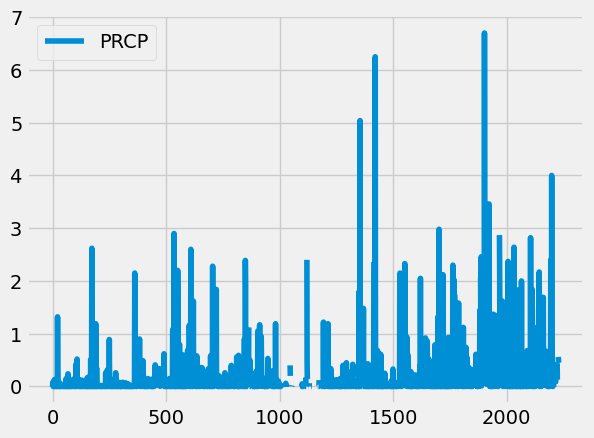

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

ls_12_mths = dt.date(2017,8,23) - dt.timedelta(days=365)

ls_yr_prcp = session.query(hawaii_measurement.date, hawaii_measurement.prcp).\
filter(hawaii_measurement.date >= ls_12_mths).all()

ls_yr_prcp

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
ls_yr_prcp_df = pd.DataFrame(ls_yr_prcp, columns =["date", "PRCP"])
ls_yr_prcp_df




# Sort the dataframe by date
ls_yr_prcp_df.sort_values(by = ["date"])

# # Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates

ax = ls_yr_prcp_df.plot(x_compat=True)
tick_locations = []
plt.xlim(2016-8-23,date)
plt.xticks(tick_locations, ls_yr_prcp_df["date"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Last 12 Months Precipitation")
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_prcp = session.query(hawaii_measurement.prcp).all()
df = pd.DataFrame(summary_prcp, columns = ["precipitation"])
df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(hawaii_station.station)).all()

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_count = session.query(hawaii_measurement.station, func.count(hawaii_measurement.station)).\
group_by(hawaii_measurement.station).\
order_by(func.count(hawaii_measurement.station).desc()).\
all()

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most_active_station_temp = session.query(hawaii_measurement.station, hawaii_measurement.tobs).\
# filter(hawaii_measurement.station == 'USC00519281').\
# all()

session.query(func.min(hawaii_measurement.tobs), func.max(hawaii_measurement.tobs), func.avg(hawaii_measurement.tobs)).\
filter(hawaii_measurement.station == 'USC00519281').\
all()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

ls_12_mths = dt.date(2017,8,23) - dt.timedelta(days=365)

ls_yr_temp = session.query(hawaii_measurement.date, hawaii_measurement.tobs).\
filter(hawaii_measurement.date >= ls_12_mths).all()

ls_yr_temp

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
ls_yr_temp_df = pd.DataFrame(ls_yr_temp, columns = ["Frequency", "Temperature"])
ls_yr_temp_df



# Sort the dataframe by date
# ls_yr_prcp_df.sort_values(by = ["date"])

# # # Use Pandas Plotting with Matplotlib to plot the data
# import matplotlib.dates as mdates

# ax = ls_yr_prcp_df.plot(x_compat=True)
# tick_locations = []
# plt.xlim(2016-8-23,date)
# plt.xticks(tick_locations, ls_yr_prcp_df["date"])
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.title("Last 12 Months Precipitation")
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# plt.show()


# Close Session

In [ ]:
# Close Session
session.close()